In [1]:
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from matplotlib.axes import Axes
from matplotlib.cm import coolwarm

import gpflow

2024-11-13 08:53:09.073907: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-13 08:53:09.167236: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-13 08:53:09.167259: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-11-13 08:53:09.193730: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-13 08:53:09.634125: W tensorflow/stream_executor/platform/de

logspace:

In [5]:
import importlib
import summary_stats
import single_fid
import h5py
import numpy as np
import matplotlib.pyplot as plt
importlib.reload(summary_stats)
importlib.reload(single_fid)
proj = summary_stats.ProjCorr(data_dir='/home/qezlou/HD2/HETDEX/cosmo/data/corr_projected/', fid='L2', logging_level='INFO')
_, wp, model_err = proj.get_mean_std(r_range=[0, 100])
X = proj.get_params_array()

# We have negative values as low as -1, so we need to replace them with a small number
# since we are going to take the log10 of the data. The wp changes alot, so log is better
Y = wp
Y[Y < 0] = 1e-10
Y = np.log10(wp)


print(f'X shape: {X.shape}, Y shape: {Y.shape}, model_err shape: {model_err.shape}') 
sf = single_fid.SingleFid(X = X, Y = Y, model_err = model_err, logging_level='DEBUG')
sf.train()


11/13/2024 08:53:46 AM Total snapshots: 200
11/13/2024 08:53:46 AM Total snapshots: 200
11/13/2024 08:53:46 AM Orignial corr shape (100, 65, 5)
11/13/2024 08:53:46 AM Orignial corr shape (100, 65, 5)
11/13/2024 08:53:47 AM Found 19.1 % of W_rp_pi is negative
11/13/2024 08:53:47 AM Found 19.1 % of W_rp_pi is negative
11/13/2024 08:53:47 AM Found 2.8 % of W_rp is all negeative along the pi direction
11/13/2024 08:53:47 AM Found 2.8 % of W_rp is all negeative along the pi direction
11/13/2024 08:53:47 AM Load IC file from all_ICs.json
11/13/2024 08:53:47 AM Load IC file from all_ICs.json
11/13/2024 08:53:47 AM moved -1 steps out of 200 sims to find a non-nan median
11/13/2024 08:53:47 AM moved -1 steps out of 200 sims to find a non-nan median


X shape: (200, 10), Y shape: (200, 65), model_err shape: (200, 65)


<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=4.776843541476281> <tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([  0.43253967, 148.88641065,   0.86614786,   0.47948508,
         1.00815113,   3.87472013,   2.60536307,   2.21123948,
         3.03114632,   1.99886325])>


NameError: name 'loo_errors' is not defined

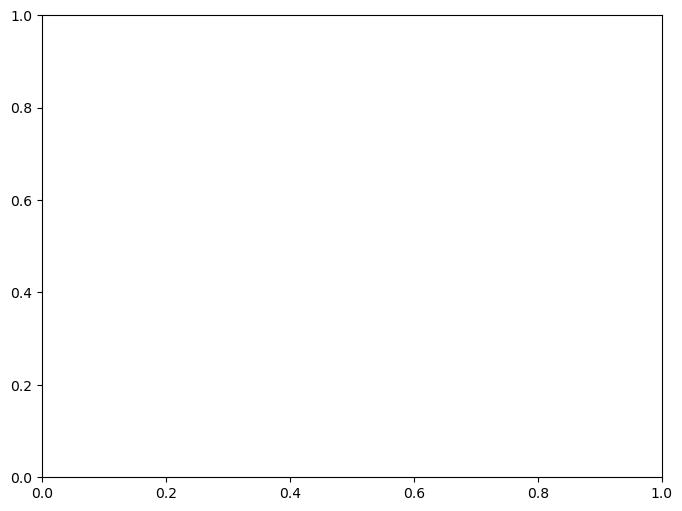

In [6]:
print(sf.model.kernel.variance, sf.model.kernel.lengthscales)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ind = (proj.rp > 1) & (proj.rp < 101)
ax.plot(proj.rp[ind], loo_errors)
ax.set_xscale('log')
ax.set_ylim(0, 50)

In [7]:
sf.train()
print(sf.model.kernel.variance, sf.model.kernel.lengthscales)

<Parameter: name=softplus, dtype=float64, shape=[], fn="softplus", numpy=4.776843541476281> <tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([  0.43253967, 148.88641065,   0.86614786,   0.47948508,
         1.00815113,   3.87472013,   2.60536307,   2.21123948,
         3.03114632,   1.99886325])>


In [14]:
proj.params_list

['omega0',
 'omegab',
 'hubble',
 'scalar_amp',
 'ns',
 'w0_fld',
 'wa_fld',
 'N_ur',
 'alpha_s',
 'm_nu']

 /tmp/ipykernel_170765/570128926.py:9: UserWarning:Attempt to set non-positive xlim on a log-scaled axis will be ignored.


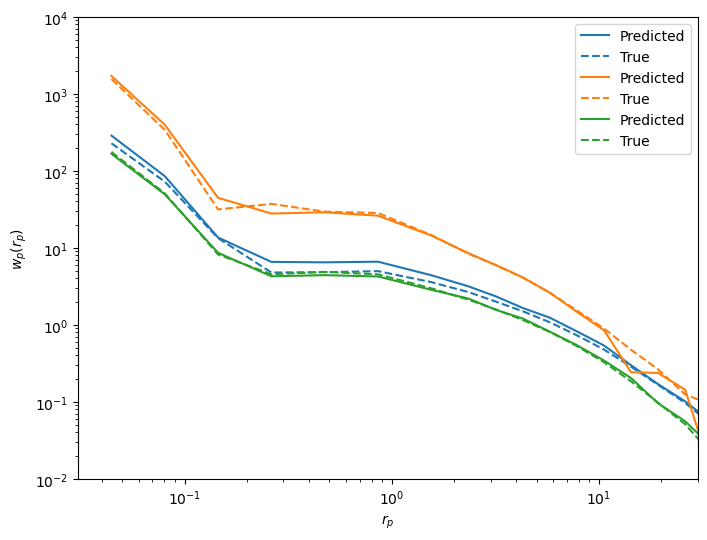

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
#ax.plot(proj.rp, Y[0,:], label='True')
mean_pred,_ = sf.predict(sf.X)
for c, i in enumerate([10, 45, 92]):
    #ax.plot(proj.rp, Y[i,:], label='True')
    ax.plot(proj.rp, 10**mean_pred[i], label='Predicted', color=f'C{c}') 
    ax.plot(proj.rp, 10**Y[i,:], label='True', ls='--', color=f'C{c}')
ax.set_xscale('log')
ax.set_xlim(0, 30)
ax.set_ylim(1e-2, 1e4)
ax.set_yscale('log')
ax.set_ylabel(r'$w_p(r_p)$')
ax.set_xlabel(r'$r_p$')
ax.legend()